# Homework 7 - Logistic Regression

### Name: Shayari Peiris
### Collaborator: Vishwesh Srinivasan, Veer Kumar


DATA 201A 

Fall 2022

Tufts University

# Homework 7 - Logistic Regression 
This homework will go over Logistic Regression ROC and AUC, and the RFECV function. There will also be a bonus question not really related to Logistic Regression but kind of, I think it will be a good challenge. The data we are using is the csv named 'surfs_up.csv'. This data has seven columns of data long with a binary classification. Each column represents a certain attribute of the days conditions, and the binary classification is whether it is a good day to surf or not (subjectively picked by the person who made the dataset). The columns, in order of appearance, are as follows:

Air Temperature, in Fahrenheit


Wind Gust, in meters per second


Average Wave Period, in seconds


Wind Speed, in meters per second


Wave Height, in feet


Water Temperature, in Fahrenheit


Dominant Wave Period, in seconds


In the first question I ask you to set the column names, pick column names that are appropriate.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as st

#Importing Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from scipy.special import expit
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

# Question 1 - Get to know the data
(a) Load in the data 'surfsup.csv' into a dataframe, and remove the two blank columns. Then, (b) Rename the columns based off of the data description. (c) Report how many of each class there is.

In [136]:
#Q1 
#(a) Load in the data 'surfsup.csv' into a dataframe, and remove the two blank columns
data = pd.read_csv('surfs_up.csv')
data = data.drop(columns=['Unnamed: 7', 'Unnamed: 8'])
data

,3.7625,12.37916667,4.42125,10.35833333,5.1591209,45.5,5.39375,0
0,8.5550,12.970833,4.278000,11.254167,4.921260,44.384000,5.228000,0
1,22.0550,10.158333,3.908095,8.995833,3.790933,43.935714,4.502857,0
2,28.0700,14.495833,5.226667,12.787500,9.072206,43.981250,6.241667,0
3,18.2600,20.779167,6.984783,18.000000,13.118367,44.466957,10.050870,0
4,6.2075,19.037500,5.572500,16.233333,9.594220,43.757273,6.553864,0
...,...,...,...,...,...,...,...,...
194,65.8250,5.270833,5.052292,4.912500,2.601433,66.893750,8.404375,1
195,65.5850,2.633333,6.204375,2.408333,2.606217,67.482500,8.561250,1
196,68.6675,6.137500,4.788542,5.766667,2.935668,67.366250,7.145417,1
197,69.5825,5.158333,5.248750,4.862500,2.455845,68.476250,7.519792,1


In [137]:
#Q1 cont
#(b) Rename the columns based off of the data description
data = data.rename(columns={'3.7625': 'Air Temperature, in Fahrenheit', 
                            '12.37916667': 'Wind Gust, in meters per second', 
                            '4.42125': 'Average Wave Period, in seconds', 
                            '10.35833333': 'Wind Speed, in meters per second',
                            '5.1591209': 'Wave Height, in feet',
                            '45.5': 'Water Temperature, in Fahrenheit', 
                            '5.39375': 'Dominant Wave Period, in seconds', 
                            '0': 'Good day to surf?'})
data

,"Air Temperature, in Fahrenheit","Wind Gust, in meters per second","Average Wave Period, in seconds","Wind Speed, in meters per second","Wave Height, in feet","Water Temperature, in Fahrenheit","Dominant Wave Period, in seconds",Good day to surf?
0,8.5550,12.970833,4.278000,11.254167,4.921260,44.384000,5.228000,0
1,22.0550,10.158333,3.908095,8.995833,3.790933,43.935714,4.502857,0
2,28.0700,14.495833,5.226667,12.787500,9.072206,43.981250,6.241667,0
3,18.2600,20.779167,6.984783,18.000000,13.118367,44.466957,10.050870,0
4,6.2075,19.037500,5.572500,16.233333,9.594220,43.757273,6.553864,0
...,...,...,...,...,...,...,...,...
194,65.8250,5.270833,5.052292,4.912500,2.601433,66.893750,8.404375,1
195,65.5850,2.633333,6.204375,2.408333,2.606217,67.482500,8.561250,1
196,68.6675,6.137500,4.788542,5.766667,2.935668,67.366250,7.145417,1
197,69.5825,5.158333,5.248750,4.862500,2.455845,68.476250,7.519792,1


In [138]:
#Q1 cont
#(c) Report how many of each class there is
data['Good day to surf?'].value_counts()

0    101
1     98
Name: Good day to surf?, dtype: int64

# Question 2 - An ROC curve from basic threshold classification
(a) Create a new variable that is just the Dominant Wave Period column, and also create a response column variable. (b) Create a function that takes in a Series and a threshold, and returns a series of predictions based off of the threshold (1 for above the threshold, 0 for below it). (c) Create a linear range of 10 points in the actual range of the data, run your function on each point as your threshold value, and at each point find the TPR and FPR associated with the threshold. (d) Plot the points as pairs (FPR,TPR), but first sorting by FPR. (e) Repeat part (c) and (d) except for 25 different thresholds in the range.

In [139]:
#Q2 (I would suggest using individual cell for each sub question)
#(a)
#creating 2 series for the columns we're interested in 
dom_wave_period = data['Dominant Wave Period, in seconds']
response_actual = data['Good day to surf?']

In [140]:
#Q2
#(b)
# defining the function
def predictor(series, threshold):
    res_list = []
    for i in range(len(series)):
        if series[i] > threshold:
            res_list.append(1)
        else:
            res_list.append(0)
    response = pd.Series(res_list)
    return response

In [141]:
#Q2 
#(c)
# calculating the TPR and FPR of the predictions of the above defined function for 10 different thresholds 
metric = []
input_series = np.linspace(min(dom_wave_period), max(dom_wave_period),10)
for i in input_series:
    response = predictor(dom_wave_period, i)
    cm = confusion_matrix(response_actual,response)
    TN = cm[0,0]
    TP = cm[1,1]
    FN = cm[1,0]
    FP = cm[0,1]
    TPR = round(TP/float(TP+FN),3)
    FPR = round((1- round(TN/float(TN+FP),3)),3)
    metric.append((TPR,FPR))

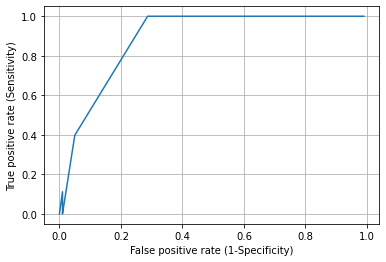

In [142]:
#Q2 
#(d)
#plotting the ROC curve
metric.sort(key=lambda x: x[1])
plt.plot([x[1] for x in metric], [x[0] for x in metric])
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

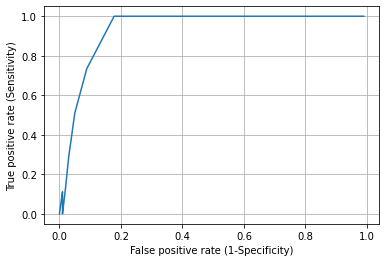

In [143]:
#Q2 
#(e)
# calculating the TPR and FPR of the predictions of the above defined function for 25 different thresholds 
metric = []
input_series = np.linspace(min(dom_wave_period), max(dom_wave_period),25)
for i in input_series:
    response = predictor(dom_wave_period, i)
    cm = confusion_matrix(response_actual,response)
    TN = cm[0,0]
    TP = cm[1,1]
    FN = cm[1,0]
    FP = cm[0,1]
    TPR = round(TP/float(TP+FN),3)
    FPR = round((1- round(TN/float(TN+FP),3)),3)
    metric.append((TPR,FPR))
# plotting the ROC curve
metric.sort(key = lambda x: x[1])
plt.plot([x[1] for x in metric], [x[0] for x in metric])
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Question 3 - One-Dim Logistic Regression
(a) Run a logistic regression on the single column we were using in Q2, using a testsize of 0.3. Create and display the confusion matrix, report the accuracy. (b) Pull the coefficient and intercept out of the model and transform the Series based off of the sigmoid function. Plot the transformed data against the original data, i.e. the series will be the x variable and the transformed data will be the y data. What is a reasonable decision threshold here? (c) Plot the ROC curve for the model and report the AUC.

In [144]:
#Q3
#(a) #Creating independent (Predictor) and dependent variables (Target)

X = data[['Dominant Wave Period, in seconds']]

y = data['Good day to surf?']

#Splitting the data into training and testing (70% Train and 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Instantiating the LogisticRegression Object
logreg = LogisticRegression()

#Fitting the model on our training data using fit method
logreg.fit(X_train, y_train)

#Making predictions on Testing Model
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

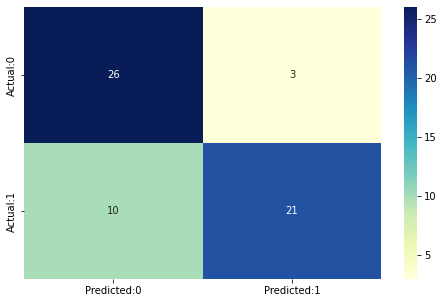

In [145]:
#Q3
#(a) cont

#Creating Confusion Matrix to evaluate the model
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [146]:
#Q3
#(a) cont
# finding the accuracy of the model
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),3))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.783


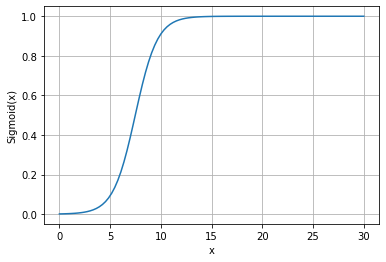

In [147]:
#Q3
#(b)
#plotting the sigmoid function
x = np.linspace(0,30,100)
sigmoid = expit(x * logreg.coef_ + logreg.intercept_)
plt.plot(x,sigmoid.ravel())
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.show()

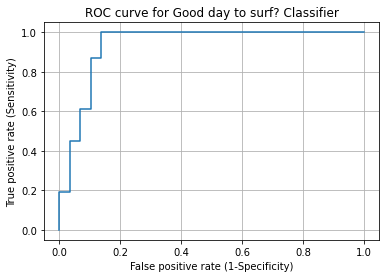

In [148]:
#Q3
#(c)
### plotting the ROC Curve
from sklearn.metrics import roc_curve

y_pred_prob_yes=logreg.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.title('ROC curve for Good day to surf? Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [149]:
#Q3
#(c) cont
#AUC - Area Under Curve

round(metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1]),3)

0.935

# Question 4 - More Dimensions
Run a Logistic Regression on the data, using cross validation with five folds, and report the average accuracy of the model.

In [150]:
#Q4
#To view the columns for creating dependent and independent variables
data.columns

Index(['Air Temperature, in Fahrenheit', 'Wind Gust, in meters per second',
       'Average Wave Period, in seconds', 'Wind Speed, in meters per second',
       'Wave Height, in feet', 'Water Temperature, in Fahrenheit',
       'Dominant Wave Period, in seconds', 'Good day to surf?'],
      dtype='object')

In [151]:
#Q4 cont
#Creating independent (Predictor) and dependent variables (Target)
X = data[['Air Temperature, in Fahrenheit', 'Wind Gust, in meters per second',
       'Average Wave Period, in seconds', 'Wind Speed, in meters per second',
       'Wave Height, in feet', 'Water Temperature, in Fahrenheit',
       'Dominant Wave Period, in seconds']]

y = data['Good day to surf?']

#Splitting the data into training and testing (70% Train and 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Instantiating the LogisticRegression Object
logreg = LogisticRegression()

In [152]:
#Q4 cont
#Fitting the model on our training data using fit method
logreg.fit(X_train, y_train)

LogisticRegression()

In [153]:
#Q4 cont
#Making predictions on Testing Model
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [154]:
#Q4 cont
# 5-fold cross-validation logistic regression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# Use cross_val_score function
# We are passing the entirety of X and y since cross validation takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.798


# Question 5 - Feature Selection
(a) Use the REFCV function with a step of one, five folds of cross validation, and accuracy as your scoring. (b) How many features, and which features were selected? (c) Plot number of features against the accuracy at each step.

In [155]:
#Q5
#(a) Use the REFCV function with a step of one, five folds of cross validation, and accuracy as your scoring
#To check accuracy of cross validation score with respect to number of features

col = X_train.columns

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train.values.ravel())

RFECV(cv=5, estimator=LogisticRegression(), scoring='accuracy')

In [156]:
#Q5
#(b) How many features, and which features were selected?
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

Optimal number of features: 3
Selected features: ['Wind Gust, in meters per second', 'Average Wave Period, in seconds', 'Wave Height, in feet']


In [157]:
#Q5
#(b)
rfecv.grid_scores_

array([[0.89285714, 0.96428571, 0.82142857, 0.82142857, 0.85185185],
       [0.92857143, 0.96428571, 0.82142857, 0.82142857, 0.81481481],
       [0.92857143, 0.96428571, 0.82142857, 0.82142857, 0.85185185],
       [0.82142857, 0.92857143, 0.82142857, 0.82142857, 0.85185185],
       [0.82142857, 0.92857143, 0.82142857, 0.82142857, 0.88888889],
       [0.82142857, 0.92857143, 0.82142857, 0.78571429, 0.88888889],
       [0.82142857, 0.92857143, 0.82142857, 0.78571429, 0.88888889]])

In [158]:
#Q5
#(b)
rfecv

RFECV(cv=5, estimator=LogisticRegression(), scoring='accuracy')

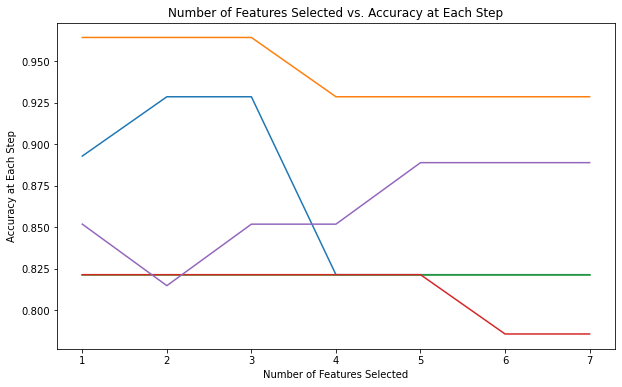

In [159]:
##Q5
#(c) Plot number of features against the accuracy at each step

# Plot number of features VS. accuracy at each step
plt.figure(figsize=(10,6))
plt.title('Number of Features Selected vs. Accuracy at Each Step')
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracy at Each Step")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Bonus (up to +10 on Total Score)
Write a function that takes in two series, one is the $X$ data, the other will be the classifications $y$, and returns the best (ish) threshold for classification, and the accuracy associated with that threshold. Any method can be used. Test the code on the column used in Q2.

In [160]:
#Bonus
def best_threshold(X,y):

IndentationError: expected an indented block (2376915407.py, line 2)